# Choose dataset
Professor Ledonwong provided us with a link to the following github: https://github.com/MridulS/pydata-networkx
+ I felt as though the game of thrones dataset was explored when it came to simply creating a graph, so I chose to look at the airport dataset

In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go

import networkx as net
import numpy as np
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

In [2]:
import random
random.seed(246) 
url="https://raw.githubusercontent.com/MridulS/pydata-networkx/master/data/passengers.csv"
df=pd.read_csv(url)
print(df.shape)
df.head()

(457982, 6)


,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
0,0,1990,ABE,ACY,{'US Airways Inc.'},73.0
1,1,1990,ABE,ATL,{'Eastern Air Lines Inc.'},73172.0
2,2,1990,ABE,AVL,{'Westair Airlines Inc.'},0.0
3,3,1990,ABE,AVP,"{'Westair Airlines Inc.', 'US Airways Inc.', '...",8397.0
4,4,1990,ABE,BHM,{'Eastern Air Lines Inc.'},59.0


# EDA
+ Our data set consists of over 450k flights
+ I felt this was too large a number to work with for my analysis, so i decided to limit the dataset to flights leaving and coming into NY(17711)
    + I then subset that data for flights in the year 2015
    + followed by taking a random sample of 10% of the data leaving us with 81 flights

In [3]:
import random
random.seed(246) 
df = df[df.ORIGIN.isin(["JFK", "LGA", "EWR"])|df.DEST.isin(["JFK", "LGA", "EWR"])]
df=df[df.YEAR==2015]
df = df.sample(frac=0.10)
df.shape



(81, 6)

# Draw Graph

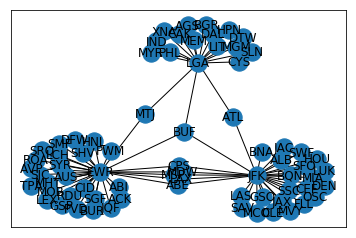

In [23]:
random.seed(246) 

g = net.from_pandas_edgelist(df, source='ORIGIN', target='DEST')

net.draw_networkx(g,with_labels=True,arrows=True,edge_attr=True, arrowsize=10)

In [ ]:
+ Below I subset the graph and only create edges where flights land in newark 

In [24]:
## get Newark edges
EWR_connections=df[df.DEST=="EWR"]
g_newark = net.from_pandas_edgelist(EWR_connections, source='ORIGIN', target='DEST')
pos_list=[(x,y) for x,y in g_newark.edges()]
edge_list2= pos_list[1:50]

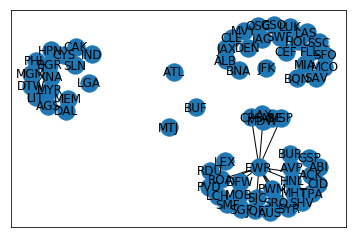

In [25]:
net.draw_networkx(g,with_labels=True,arrows=True,edge_attr=True, arrowsize=10,edgelist=edge_list2)

+ Below I attempt to set the positioning to fruchterman_reingold_layout

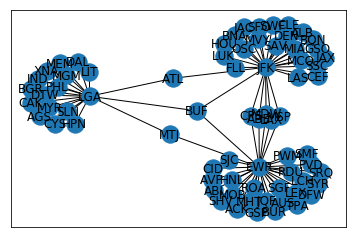

In [18]:
pos=net.fruchterman_reingold_layout(g) 
net.draw_networkx(g,with_labels=True,arrows=True,edge_attr=True, arrowsize=10,pos=pos)

# Failed attempts
+ Below I wanted to figure out a way to publish my networkx graph to plotly but I couldnt figure it out
+ the edge seemed like it needed me to feed it an integer value and I couldn't get that to happen.  

In [43]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in g.edges():
    x0, y0 = g.node[edge[0]]['pos']
    x1, y1 = g.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))



KeyError: 'pos'

# Below Graph taken from plotly  docs directly 

In [34]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

E:\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [40]:
G.edges()
pos22=net.get_node_attributes(g,'pos')
G=nx.random_geometric_graph(200,0.125)
nx.get_node_attributes(G,'pos')
Xv=[pos1[k][0] for k in range(69)]
Yv=[pos1[k][1] for k in range(69)]

NameError: name 'pos1' is not defined